## Final Project Submission

Please fill out:
* Student name: Mindy Jen
* Student pace: full time
* Scheduled project review date/time: TBD
* Instructor name: Abhineet Kulkarni 
* Blog post URL: TBD


# obtaining data

In [109]:
# Your code here - remember to use markdown cells for comments as well!
# Import statements go here
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score

from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

kc = pd.read_csv('kc_house_data.csv',index_col=None,encoding='latin1')
kc.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

## retrieve data information

In [2]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# scrubbing and cleaning Data

## run timestamp data conversion  

In [3]:
def general_datetime_converter(df, col):
    df_clone = df.copy()
    df_clone[col] = pd.to_datetime(df_clone[col])
    return df_clone

kc2 = general_datetime_converter(kc, 'date')
kc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

## read missing and symbolic values

In [4]:
def check_cols(df):
    for col in df.columns:
        print('------------------------------------------------------')
        print(col)
        print(f'unique values: {df[col].nunique(dropna=False)} (\'NaN\' included)')
        print(f'NaN exists? {df[col].isna().any()}')
        if df[col].isna().any():
            print(f'how many \'NaN\' values? {df[col].isna().sum()} ({np.divide(df[col].isna().sum(),df.shape[0])*100:.2f}%)')
        print('------------------------------------------------------')
        print(df[col].value_counts(dropna=False, normalize=True))
        print('------------------------------------------------------')
        print('\n') # Break up the output between columns
        
    return None

check_cols(kc2)

------------------------------------------------------
id
unique values: 21420 ('NaN' included)
NaN exists? False
------------------------------------------------------
795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
                ...   
7812801125    0.000046
4364700875    0.000046
3021059276    0.000046
880000205     0.000046
1777500160    0.000046
Name: id, Length: 21420, dtype: float64
------------------------------------------------------


------------------------------------------------------
date
unique values: 372 ('NaN' included)
NaN exists? False
------------------------------------------------------
2014-06-23    0.006575
2014-06-25    0.006066
2014-06-26    0.006066
2014-07-08    0.005880
2015-04-27    0.005834
                ...   
2014-07-27    0.000046
2015-03-08    0.000046
2014-11-02    0.000046
2015-05-15    0.000046
2015-05-24    0.000046
Name: date, Length: 372, dtype: float64
-------------------

Name: lat, Length: 5033, dtype: float64
------------------------------------------------------


------------------------------------------------------
long
unique values: 751 ('NaN' included)
NaN exists? False
------------------------------------------------------
-122.290    0.005325
-122.300    0.005140
-122.362    0.004815
-122.291    0.004630
-122.372    0.004584
              ...   
-121.403    0.000046
-121.804    0.000046
-121.726    0.000046
-121.895    0.000046
-121.893    0.000046
Name: long, Length: 751, dtype: float64
------------------------------------------------------


------------------------------------------------------
sqft_living15
unique values: 777 ('NaN' included)
NaN exists? False
------------------------------------------------------
1540    0.009122
1440    0.009029
1560    0.008890
1500    0.008334
1460    0.007825
          ...   
4890    0.000046
2873    0.000046
952     0.000046
3193    0.000046
2049    0.000046
Name: sqft_living15, Length: 777, dtype: 

## remove erratic symbols

In [5]:
# Your code here - Manipulate column names
subs = [(' ','_'),('.',''),("'",""),('®',''),('Â',''),('â\x84¢',''),('+','plus'),('½','half'),('-','_')]

def transform_colname(df):
    df_clone = df.copy()
    cols_rename = []
    for col in df_clone.columns:
        for old, new in subs:
            col = col.replace(old,new)
        cols_rename.append(col)
    df_clone.columns = cols_rename
    return df_clone

In [6]:
def convert_obj_to_num(df, col):
    df_clone = df.copy()
    if df_clone[col].dtype == 'object':
        df_clone[col] = df_clone[col].replace({'?':np.NaN}).astype('float64')
    return df_clone

kc3 = convert_obj_to_num(kc2, 'sqft_basement')
kc3.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## replace missing values

In [7]:
def find_null_cols(df):
    df_clone = df.copy()
    print('\'NaN\' found in columns as follows:')
    for col in df_clone.columns:
        if (df_clone[col].isnull().any()) | (df_clone[col].isna().any()):
            print(f'\t{col:30} contains {df_clone[col].isna().sum():10} null values ({df_clone[col].isna().sum()*100/df_clone.shape[0]:5.2f}%) !')
    return None

find_null_cols(kc3)

'NaN' found in columns as follows:
	waterfront                     contains       2376 null values (11.00%) !
	view                           contains         63 null values ( 0.29%) !
	sqft_basement                  contains        454 null values ( 2.10%) !
	yr_renovated                   contains       3842 null values (17.79%) !


### continuous features

In [8]:
def fill_null_cols(df, col, nullified=False):
    df_clone = df.copy()
    if nullified:
        df_clone[col] = df_clone[col].fillna(0)
    else:
        try:
            median = df_clone[col].median()
            mean = df_clone[col].mean()
            print(f'{col}: median {median:.3f}, mean {mean:.3f}')
            if median > 0:
                df_clone[col] = df_clone[col].fillna(median)
            else:
                df_clone[col] = df_clone[col].fillna(mean)
        except:
            print('N/A')
    return df_clone

In [9]:
kc4 = fill_null_cols(kc3, 'sqft_basement', nullified=False)
kc4.sqft_basement.isna().any()

sqft_basement: median 0.000, mean 291.852


False

In [10]:
kc5 = fill_null_cols(kc4, 'yr_renovated', nullified=True)
print(kc5.yr_renovated.isna().any())
kc5.yr_renovated.unique()

False


array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

### discrete, categorical features

In [11]:
def replace_null_cols(df, col, obj=False):
    df_clone = df.copy()
    if obj:
        df_clone[col] = df_clone[col].fillna('unknown')
    else:
        #df_clone[col] = df_clone[col].fillna(-1)
        # Thomas T. 
        df_clone[col] = df_clone[col].fillna(0)
    return df_clone

In [12]:
kc6 = replace_null_cols(kc5, 'waterfront', obj=False)
kc6.waterfront.isna().any()

False

In [13]:
kc7 = replace_null_cols(kc6, 'view', obj=False)
kc7.view.isna().any()

False

In [14]:
def transform_col_to_binary(df, col):
    df_clone = df.copy()
    df_clone[col+'_korg'] = df_clone[col]
    for idx in range(df_clone.shape[0]):
        if df_clone.loc[idx,col] > 0:
            df_clone.loc[idx,col] = 1
    return df_clone

In [15]:
kc7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

In [16]:
kc8 = transform_col_to_binary(kc7, 'yr_renovated')
print('any NaN?',kc8.yr_renovated.isna().sum())
print(kc8.yr_renovated.nunique())
print('after:',kc8.yr_renovated.unique())
print('before:',kc8.yr_renovated_korg.unique())

any NaN? 0
2
after: [0. 1.]
before: [   0. 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951.
 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


## remove duplications

In [17]:
def check_remove_duplicated_data(df):
    df_clone = df.copy()
    #df_clone['is_duplicated'] = df_clone.duplicated(subset=None, keep='first')
    do_drop = '0'
    for col in df_clone.columns:
        print(f'{col} contains duplications?')
        if df_clone[col].duplicated().value_counts(normalize=True, sort=False)[0] == 1:
            print('Nope!')
        else:
            print(f'Yes, how much? {df_clone[col].duplicated().value_counts(normalize=True, sort=False)[1]}')
            do_drop = input('drop? enter 1 (\'True\') or 0 (\'False\')')
            if do_drop == '1':
                df_clone[col+'_kdup'] = df_clone[col]
                #df_clone[col] = df_clone[col].drop_duplicates(keep='first') 
                # Thomas T.
                df_clone[col] = df_clone[col].drop_duplicates(keep='last')
                print(f' duplications in {col} dropped ... ')
            else:
                print(f' skip {col} ... ')
        print('---------------------------------------------------------------------------')
    return df_clone

In [18]:
kc9 = check_remove_duplicated_data(kc8)
kc9.columns

id contains duplications?
Yes, how much? 0.008195582719822198
drop? enter 1 ('True') or 0 ('False')1
 duplications in id dropped ... 
---------------------------------------------------------------------------
date contains duplications?
Yes, how much? 0.9827753854702042
drop? enter 1 ('True') or 0 ('False')0
 skip date ... 
---------------------------------------------------------------------------
price contains duplications?
Yes, how much? 0.832291521970644
drop? enter 1 ('True') or 0 ('False')0
 skip price ... 
---------------------------------------------------------------------------
bedrooms contains duplications?
Yes, how much? 0.9994443672732324
drop? enter 1 ('True') or 0 ('False')0
 skip bedrooms ... 
---------------------------------------------------------------------------
bathrooms contains duplications?
Yes, how much? 0.9986572209103116
drop? enter 1 ('True') or 0 ('False')0
 skip bathrooms ... 
---------------------------------------------------------------------------

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_renovated_korg',
       'id_kdup'],
      dtype='object')

## remove extreme outliers

In [19]:
def remove_outliers(df):
    df_clone = df.copy()
    cuts = []
    do_work = '0'
    do_cut = '0'
    read_cut = '0'
    
    for col in df_clone.columns:
        print('\n')
        print('***************************************************************************')
        print(f'{col} (data type: {df_clone[col].dtype}):')
        print(f'>>>>>> remaining data size {df_clone.shape[0]} wrt {df.shape[0]}')
        print(f'>>>>>> Percent remained (previous cuts applied): {round(df_clone.shape[0]/df.shape[0],3)}')
        do_work = input('wanna continue? enter 1 (\'True\') or 0 (\'False\')')
        if do_work == '1':    
            print ('----------------------------------------------------------------------')
            print(df_clone[col].value_counts(dropna=False,normalize=True))
            print ('----------------------------------------------------------------------')
            q75, q25 = np.percentile(df_clone[col], [75 ,25])
            iqr = q75 - q25
            minVal = q25 - (1.73 * iqr)
            maxVal = q75 + (1.73 * iqr)
            print(f'*** IQR: {iqr:.6f} ********* ') 
            print(f'*** minValue: {minVal:.6f} *** ') 
            print(f'*** maxValue: {maxVal:.6f} *** ')
            print('-----------------------------------------------------------------------')
            do_cut = input('make cut? enter 1 (\'True\') or 0 (\'False\')')
            if (maxVal == minVal) & (do_cut == '1'):
                do_cut = 0
                print('minimal and maximal values are the same. cut not recommended.')
            if do_cut == '1':
                print(f'\tcut on {col} applied ... ')   
                try:
                    orig_tot = df.shape[0]
                    df_cut = df_clone.copy()
                    df_cut = df_clone[(df_clone[col]<minVal) | (df_clone[col]>maxVal)]
                    df_clone = df_clone[(df_clone[col]>minVal) & (df_clone[col]<maxVal)]
                    print(f'\tPercent removed: {round(df_cut.shape[0]/orig_tot,3)}')
                    cuts.append([col,round(minVal,6),round(maxVal,6),round(df_clone.shape[0]/df.shape[0],3),round(df_cut.shape[0]/orig_tot,3)])
                except Exception as e:
                    print('\t\t>>> Sorry! ',e)
            else:
                print(f'\tskip {col} ... ')
                read_cut = input('\tbut... wanna read cut? enter 1 (\'True\') or 0 (\'False\')')
                if read_cut == '1':
                    try:
                        orig_tot = df_clone.shape[0]
                        df_cut = df_clone.copy()
                        df_cut = df_clone[(df_clone[col]<minVal) | (df_clone[col]>maxVal)]
                        df_clone = df_clone[(df_clone[col]>minVal) & (df_clone[col]<maxVal)]
                        print(f'\tPercent removed: {round(df_cut.shape[0]/orig_tot,3)}')
                        cuts.append([col,round(minVal,6),round(maxVal,6),round(df_clone.shape[0]/df.shape[0],3),round(df_cut.shape[0]/orig_tot,3)])
                    except Exception as e:
                        print('\t\t>>> Sorry! ',e)
                    df_clone = df.copy()
                else:
                    cuts.append([col,0.,0.,0.,0.])
        else:
            cuts.append([col,0.,0.,0.,0.])
            continue
        input("Press Enter to continue...")
    return cuts, df_clone

In [21]:
results, kc10 = remove_outliers(kc9)
print(kc10.columns)
results



***************************************************************************
id (data type: float64):
>>>>>> remaining data size 21597 wrt 21597
>>>>>> Percent remained (previous cuts applied): 1.0
wanna continue? enter 1 ('True') or 0 ('False')0


***************************************************************************
date (data type: datetime64[ns]):
>>>>>> remaining data size 21597 wrt 21597
>>>>>> Percent remained (previous cuts applied): 1.0
wanna continue? enter 1 ('True') or 0 ('False')0


***************************************************************************
price (data type: float64):
>>>>>> remaining data size 21597 wrt 21597
>>>>>> Percent remained (previous cuts applied): 1.0
wanna continue? enter 1 ('True') or 0 ('False')1
----------------------------------------------------------------------
350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
              ...   
870515.0    0.000046
336950.0    0.000046
38610

make cut? enter 1 ('True') or 0 ('False')1
	cut on condition applied ... 
	Percent removed: 0.001
Press Enter to continue...


***************************************************************************
grade (data type: int64):
>>>>>> remaining data size 17904 wrt 21597
>>>>>> Percent remained (previous cuts applied): 0.829
wanna continue? enter 1 ('True') or 0 ('False')1
----------------------------------------------------------------------
7     0.460065
8     0.292951
9     0.104278
6     0.100648
10    0.028485
5     0.009048
11    0.003966
4     0.000559
Name: grade, dtype: float64
----------------------------------------------------------------------
*** IQR: 1.000000 ********* 
*** minValue: 5.270000 *** 
*** maxValue: 9.730000 *** 
-----------------------------------------------------------------------
make cut? enter 1 ('True') or 0 ('False')1
	cut on grade applied ... 
	Percent removed: 0.035
Press Enter to continue...


******************************************************

[['id', 0.0, 0.0, 0.0, 0.0],
 ['date', 0.0, 0.0, 0.0, 0.0],
 ['price', -236790.0, 1203790.0, 0.955, 0.045],
 ['bedrooms', 1.27, 5.73, 0.932, 0.022],
 ['bathrooms', -0.23, 4.23, 0.929, 0.003],
 ['sqft_living', -354.6, 4194.6, 0.921, 0.008],
 ['sqft_lot', -4065.2, 19305.2, 0.83, 0.091],
 ['floors', -0.73, 3.73, 0.83, 0.0],
 ['waterfront', 0.0, 0.0, 0.0, 0.0],
 ['view', 0.0, 0.0, 0.0, 0.0],
 ['condition', 1.27, 5.73, 0.829, 0.001],
 ['grade', 5.27, 9.73, 0.794, 0.035],
 ['sqft_above', -199.4, 3279.4, 0.783, 0.011],
 ['sqft_basement', -865.0, 1365.0, 0.774, 0.009],
 ['yr_built', 0.0, 0.0, 0.0, 0.0],
 ['yr_renovated', 0.0, 0.0, 0.0, 0.0],
 ['zipcode', 0.0, 0.0, 0.0, 0.0],
 ['lat', 0.0, 0.0, 0.0, 0.0],
 ['long', 0.0, 0.0, 0.0, 0.0],
 ['sqft_living15', 263.6, 3296.4, 0.769, 0.005],
 ['sqft_lot15', -2120.0, 15720.0, 0.756, 0.014],
 ['yr_renovated_korg', 0.0, 0.0, 0.0, 0.0],
 ['id_kdup', 0.0, 0.0, 0.0, 0.0]]

In [43]:
kc10['yr_sold'] = kc10['date'].dt.year
kc10['mo_sold'] = kc10['date'].dt.month
print(kc10.dtypes)
kc10.head()

id                          float64
date                 datetime64[ns]
price                       float64
bedrooms                      int64
bathrooms                   float64
sqft_living                   int64
sqft_lot                      int64
floors                      float64
waterfront                  float64
view                        float64
condition                     int64
grade                         int64
sqft_above                    int64
sqft_basement               float64
yr_built                      int64
yr_renovated                float64
zipcode                       int64
lat                         float64
long                        float64
sqft_living15                 int64
sqft_lot15                    int64
yr_renovated_korg           float64
id_kdup                       int64
yr_sold                       int64
mo_sold                       int64
dtype: object


id       date     price  bedrooms  bathrooms  sqft_living  \
0  7.129301e+09 2014-10-13  221900.0         3       1.00         1180   
1  6.414100e+09 2014-12-09  538000.0         3       2.25         2570   
2  5.631500e+09 2015-02-25  180000.0         2       1.00          770   
3  2.487201e+09 2014-12-09  604000.0         4       3.00         1960   
4  1.954401e+09 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode      lat  \
0      5650     1.0         0.0   0.0  ...           0.0    98178  47.5112   
1      7242     2.0         0.0   0.0  ...           1.0    98125  47.7210   
2     10000     1.0         0.0   0.0  ...           0.0    98028  47.7379   
3      5000     1.0         0.0   0.0  ...           0.0    98136  47.5208   
4      8080     1.0         0.0   0.0  ...           0.0    98074  47.6168   

      long  sqft_living15  sqft_lot15  yr_renovated_korg     id_kdup  yr_sold  \
0 -122.257           1340        5650                0.0  7129300520     2014   
1 -122.319           1690        7639             1991.0  6414100192     2014   
2 -122.233           2720        8062                0.0  5631500400     2015   
3 -122.393           1360        5000                0.0  2487200875     2014   
4 -122.045           1800        7503                0.0  1954400510     2015   

   mo_sold  
0       10  
1       12  
2        2  
3       12  
4        2  

[5 rows x 25 columns]

In [38]:
kc11 = kc10.drop(['date'],axis=1)
kc11.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7.129301e+09  221900.0         3       1.00         1180      5650     1.0   
1  6.414100e+09  538000.0         3       2.25         2570      7242     2.0   
2  5.631500e+09  180000.0         2       1.00          770     10000     1.0   
3  2.487201e+09  604000.0         4       3.00         1960      5000     1.0   
4  1.954401e+09  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  yr_renovated  zipcode      lat     long  \
0         0.0   0.0          3  ...           0.0    98178  47.5112 -122.257   
1         0.0   0.0          3  ...           1.0    98125  47.7210 -122.319   
2         0.0   0.0          3  ...           0.0    98028  47.7379 -122.233   
3         0.0   0.0          5  ...           0.0    98136  47.5208 -122.393   
4         0.0   0.0          3  ...           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  yr_renovated_korg     id_kdup  yr_sold  mo_sold  
0           1340        5650                0.0  7129300520     2014       10  
1           1690        7639             1991.0  6414100192     2014       12  
2           2720        8062                0.0  5631500400     2015        2  
3           1360        5000                0.0  2487200875     2014       12  
4           1800        7503                0.0  1954400510     2015        2  

[5 rows x 24 columns]

# exploring data

## count unique values 

In [22]:
def unique_features_plt(df):
    df_clone = df.copy()
    df_clone = df_clone.loc[:, df_clone.dtypes != 'object']
    print(df_clone.columns)
    print(df_clone.nunique())
    
    fig, ax = plt.subplots(1,1,figsize = (15, 5)) 
    plt.bar(df_clone.columns,df_clone.nunique(),color='green',alpha=0.4,width=0.2)
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.show()
    
    return None

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_renovated_korg', 'id_kdup',
       'yr_sold', 'mo_sold'],
      dtype='object')
id                   16181
price                 2976
bedrooms                 4
bathrooms               15
sqft_living            659
sqft_lot              6813
floors                   6
waterfront               2
view                     5
condition                4
grade                    4
sqft_above             599
sqft_basement          170
yr_built               116
yr_renovated             2
zipcode                 70
lat                   4689
long                   605
sqft_living15          531
sqft_lot15            5979
yr_renovated_korg       67
id_kdup              16181
yr_sold                  2
mo_sold                 12
dty

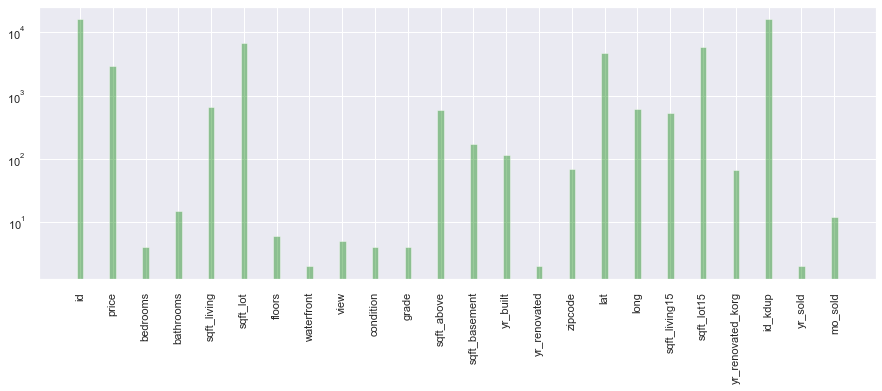

In [39]:
unique_features_plt(kc11)

## understand data

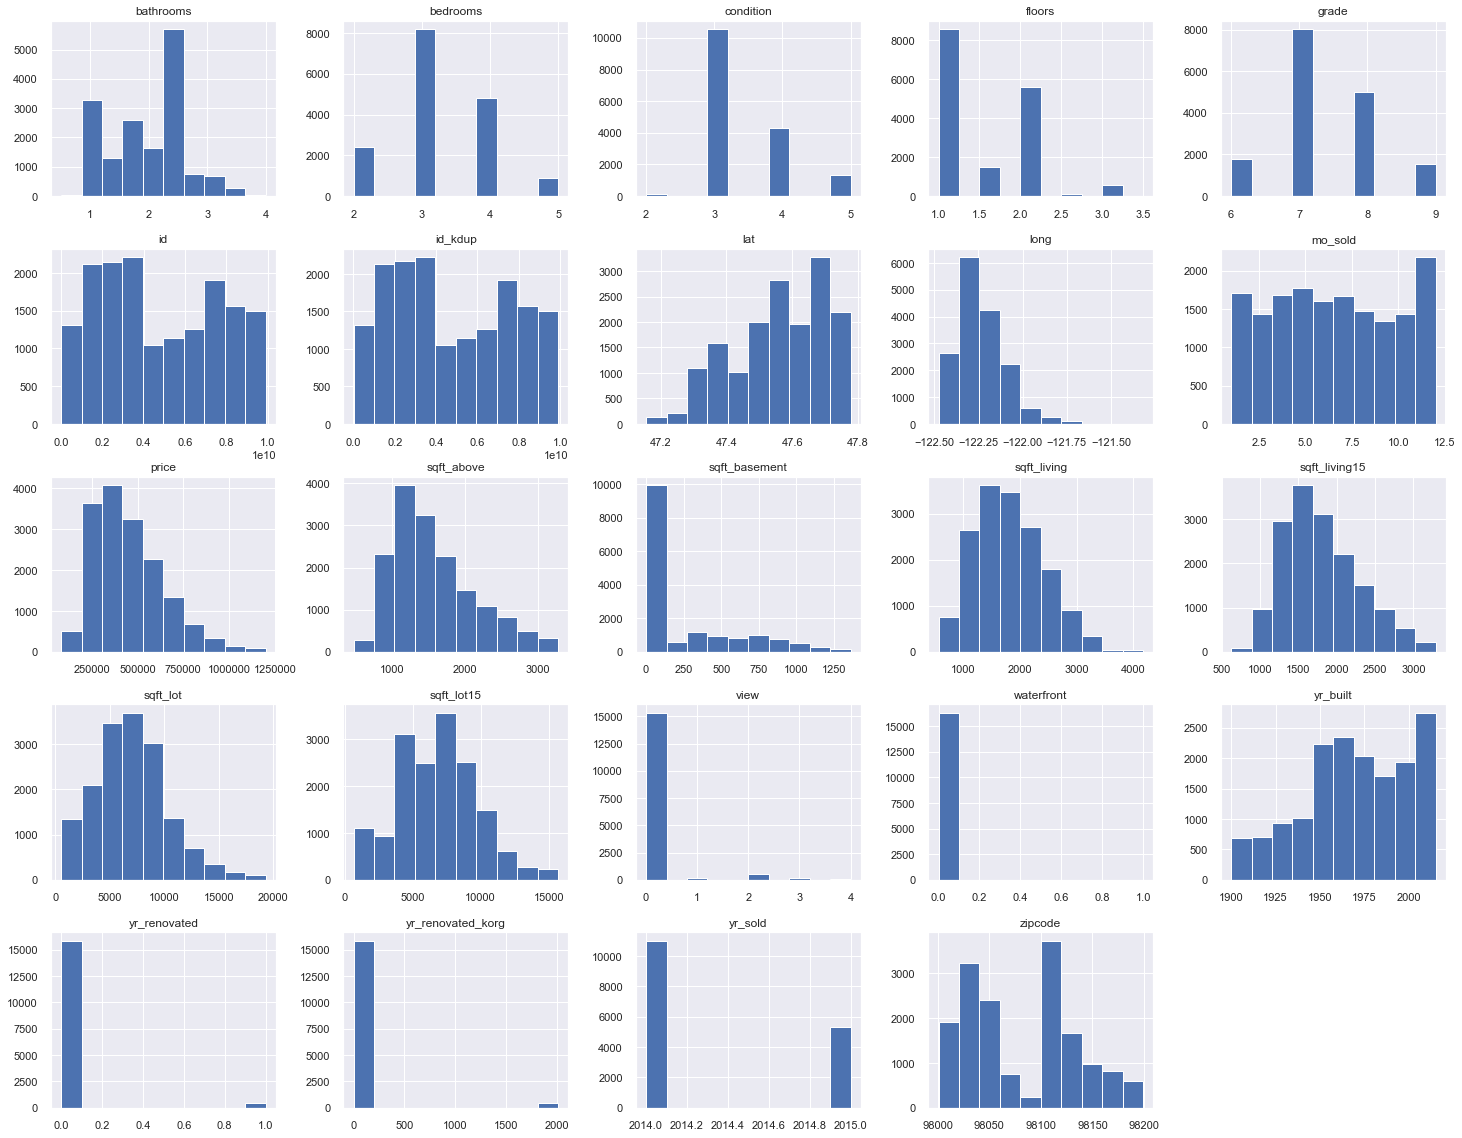

In [42]:
kc11.hist(figsize=(25,20))
plt.show()

##  inspect features

Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots for the nearest 15 neighbors

### continuous features

In [44]:
selcols = list(col for col in kc10.columns if (col != 'id') & (col != 'id_kdup'))
kc12 = kc11.loc[:, selcols]
kc13_cont = kc12.loc[:, (kc12.dtypes != 'object') & (kc12.nunique() > 20)]
print(kc13_cont.shape)
kc13_cont.head()

(16319, 12)


price  sqft_living  sqft_lot  sqft_above  sqft_basement  yr_built  \
0  221900.0         1180      5650        1180            0.0      1955   
1  538000.0         2570      7242        2170          400.0      1951   
2  180000.0          770     10000         770            0.0      1933   
3  604000.0         1960      5000        1050          910.0      1965   
4  510000.0         1680      8080        1680            0.0      1987   

   zipcode      lat     long  sqft_living15  sqft_lot15  yr_renovated_korg  
0    98178  47.5112 -122.257           1340        5650                0.0  
1    98125  47.7210 -122.319           1690        7639             1991.0  
2    98028  47.7379 -122.233           2720        8062                0.0  
3    98136  47.5208 -122.393           1360        5000                0.0  
4    98074  47.6168 -122.045           1800        7503                0.0

price AxesSubplot(0.125,0.71587;0.227941x0.16413)
sqft_living AxesSubplot(0.398529,0.71587;0.227941x0.16413)
sqft_lot AxesSubplot(0.672059,0.71587;0.227941x0.16413)
sqft_above AxesSubplot(0.125,0.518913;0.227941x0.16413)
sqft_basement AxesSubplot(0.398529,0.518913;0.227941x0.16413)
yr_built AxesSubplot(0.672059,0.518913;0.227941x0.16413)
zipcode AxesSubplot(0.125,0.321957;0.227941x0.16413)
lat AxesSubplot(0.398529,0.321957;0.227941x0.16413)
long AxesSubplot(0.672059,0.321957;0.227941x0.16413)
sqft_living15 AxesSubplot(0.125,0.125;0.227941x0.16413)
sqft_lot15 AxesSubplot(0.398529,0.125;0.227941x0.16413)
yr_renovated_korg AxesSubplot(0.672059,0.125;0.227941x0.16413)


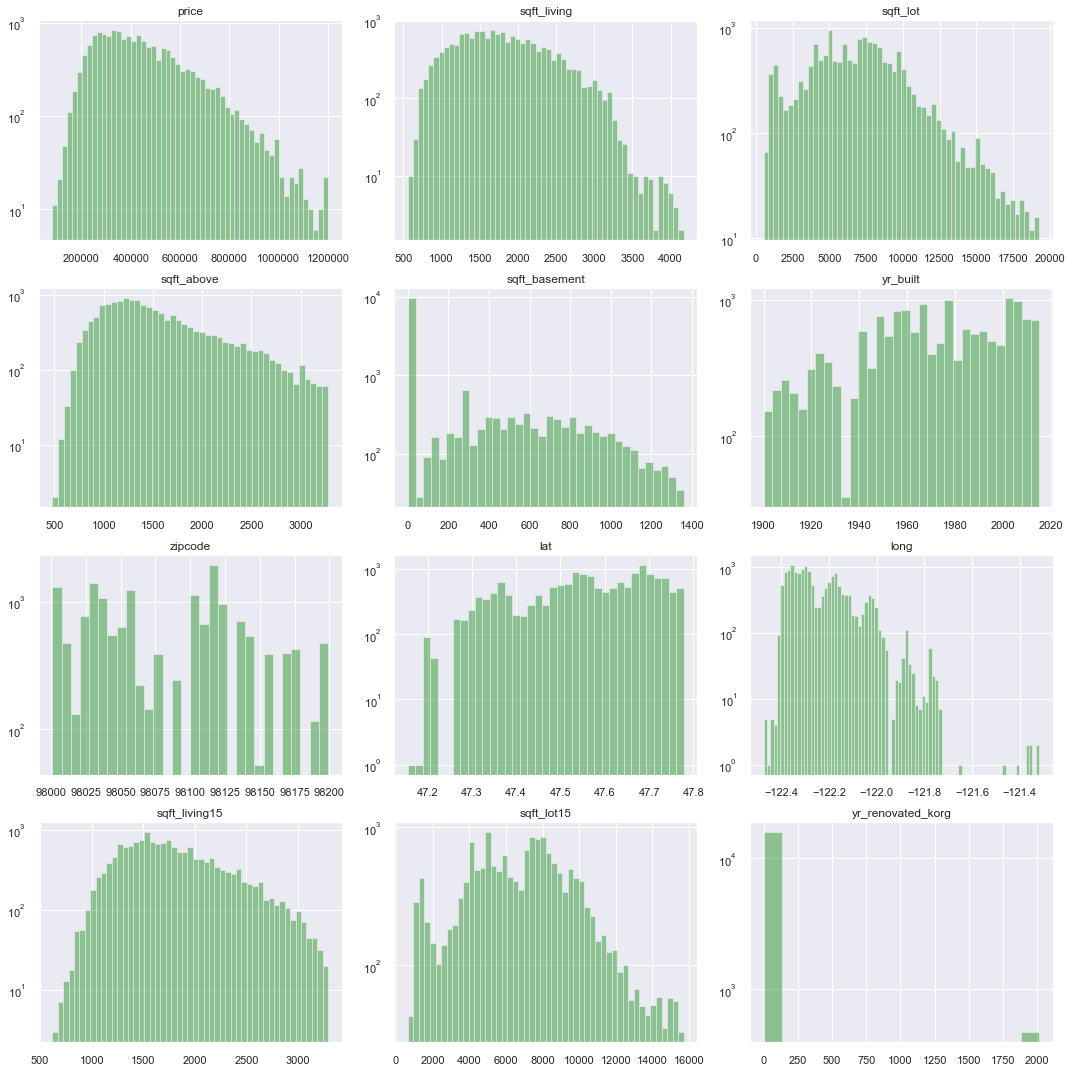

In [45]:
fig, axes = plt.subplots(nrows=kc13_cont.shape[1] // 3, ncols=3, figsize=(15,15))
continuous = list(col for col in kc13_cont.columns)
for xcol, ax in zip(continuous, axes.flatten()):
    print(xcol,ax)
    ax.hist(kc13_cont[xcol], bins='auto', alpha=0.4, color='green')
    ax.set_title(xcol)
    ax.set_yscale('log')
    
fig.tight_layout()

In [46]:
cont_cols = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15',
             'yr_built','zipcode']
kc14_cont = kc13_cont.loc[:,cont_cols]
kc14_cont['sqft_tot'] = kc14_cont['sqft_above'] + kc14_cont['sqft_basement']
kc14_cont = kc14_cont.drop(['sqft_above','sqft_basement'],axis=1)
print(kc14_cont.shape)
kc14_cont.head()

(16319, 8)


price  sqft_living  sqft_lot  sqft_living15  sqft_lot15  yr_built  \
0  221900.0         1180      5650           1340        5650      1955   
1  538000.0         2570      7242           1690        7639      1951   
2  180000.0          770     10000           2720        8062      1933   
3  604000.0         1960      5000           1360        5000      1965   
4  510000.0         1680      8080           1800        7503      1987   

   zipcode  sqft_tot  
0    98178    1180.0  
1    98125    2570.0  
2    98028     770.0  
3    98136    1960.0  
4    98074    1680.0

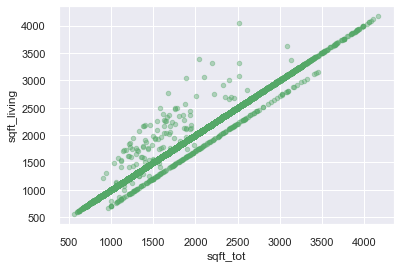

In [47]:
kc14_cont.plot(kind='scatter',x='sqft_tot',y='sqft_living',c='g',alpha=0.4)

In [48]:
kc14_cont = kc14_cont.drop(['sqft_tot'],axis=1)
print(kc14_cont.shape)
kc14_cont.head()

(16319, 7)


price  sqft_living  sqft_lot  sqft_living15  sqft_lot15  yr_built  \
0  221900.0         1180      5650           1340        5650      1955   
1  538000.0         2570      7242           1690        7639      1951   
2  180000.0          770     10000           2720        8062      1933   
3  604000.0         1960      5000           1360        5000      1965   
4  510000.0         1680      8080           1800        7503      1987   

   zipcode  
0    98178  
1    98125  
2    98028  
3    98136  
4    98074

### categoricals features

In [63]:
cate_cols = ['price','bedrooms','bathrooms','floors','view','condition','grade','mo_sold']
kc12_cate = kc11.loc[:, cate_cols]
print(kc12_cate.shape)
kc12_cate.head()

(16319, 8)


price  bedrooms  bathrooms  floors  view  condition  grade  mo_sold
0  221900.0         3       1.00     1.0   0.0          3      7       10
1  538000.0         3       2.25     2.0   0.0          3      7       12
2  180000.0         2       1.00     1.0   0.0          3      6        2
3  604000.0         4       3.00     1.0   0.0          5      7       12
4  510000.0         3       2.00     1.0   0.0          3      8        2

price AxesSubplot(0.125,0.536818;0.227941x0.343182)
bedrooms AxesSubplot(0.398529,0.536818;0.227941x0.343182)
bathrooms AxesSubplot(0.672059,0.536818;0.227941x0.343182)
floors AxesSubplot(0.125,0.125;0.227941x0.343182)
view AxesSubplot(0.398529,0.125;0.227941x0.343182)
condition AxesSubplot(0.672059,0.125;0.227941x0.343182)


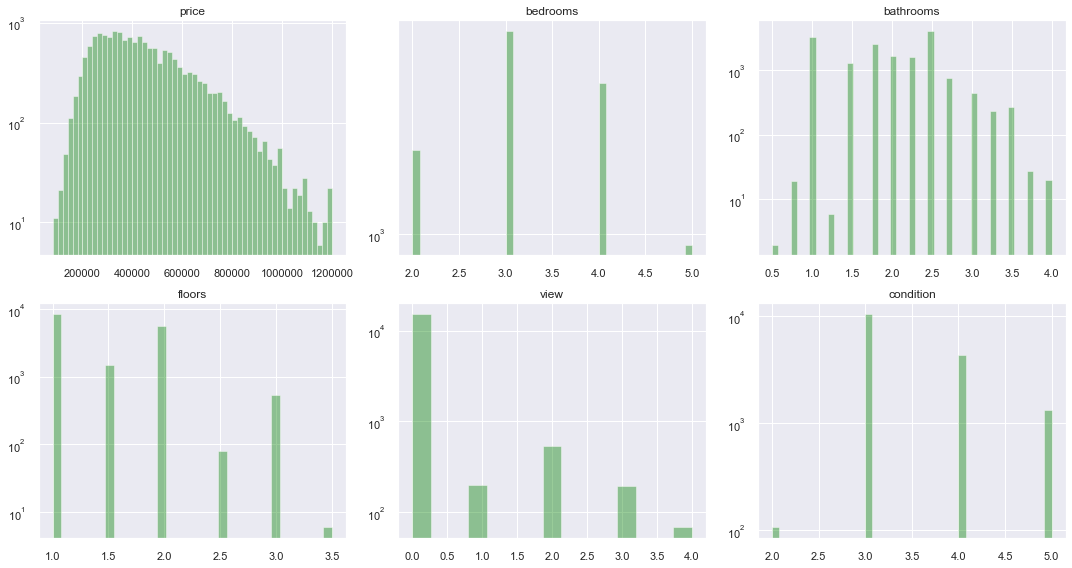

In [88]:
fig2, axes = plt.subplots(nrows=kc12_cate.shape[1] // 3, ncols=3, figsize=(15,8))
categorical = list(col for col in kc12_cate.columns)
for xcol, ax in zip(categorical, axes.flatten()):
    print(xcol,ax)
    ax.hist(kc12_cate[xcol], bins='auto', alpha=0.4, color='green')
    ax.set_title(xcol)
    ax.set_yscale('log')
    
fig2.tight_layout()

## check linearity
### continuous features

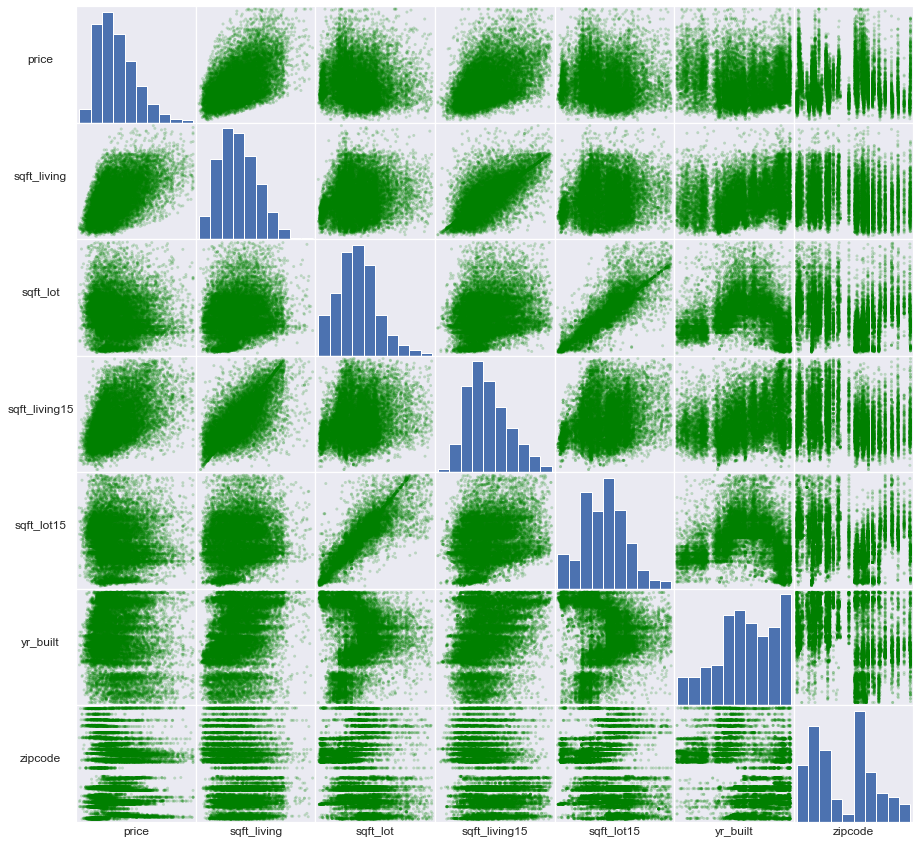

In [50]:
# Your code here 
sm = pd.plotting.scatter_matrix(kc14_cont, color='green', alpha=0.2, figsize=[15, 15]);

# Rotates the text
[s.xaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

In [51]:
kc14_cont.corr()

price  sqft_living  sqft_lot  sqft_living15  sqft_lot15  \
price          1.000000     0.512244 -0.089257       0.434334   -0.100993   
sqft_living    0.512244     1.000000  0.166807       0.694065    0.149108   
sqft_lot      -0.089257     0.166807  1.000000       0.212731    0.875662   
sqft_living15  0.434334     0.694065  0.212731       1.000000    0.231834   
sqft_lot15    -0.100993     0.149108  0.875662       0.231834    1.000000   
yr_built      -0.082819     0.292758 -0.078220       0.313070   -0.057299   
zipcode        0.045228    -0.190088 -0.247456      -0.283351   -0.250555   

               yr_built   zipcode  
price         -0.082819  0.045228  
sqft_living    0.292758 -0.190088  
sqft_lot      -0.078220 -0.247456  
sqft_living15  0.313070 -0.283351  
sqft_lot15    -0.057299 -0.250555  
yr_built       1.000000 -0.351313  
zipcode       -0.351313  1.000000

In [53]:
cc1_df = kc14_cont.corr().abs().stack().reset_index().sort_values(0, ascending=True)
print(cc1_df.head())
cc1_df['pairs'] = list(zip(cc1_df.level_0, cc1_df.level_1))
cc1pairs_df = cc1_df.set_index('pairs')
cc1pairs_df = cc1pairs_df.drop(['level_1', 'level_0'], axis=1)
cc1pairs_df.columns = ['cc']
cc1pairs_df = cc1pairs_df.drop_duplicates(keep='first')
cc1pairs_df.head()

       level_0     level_1         0
42     zipcode       price  0.045228
6        price     zipcode  0.045228
39    yr_built  sqft_lot15  0.057299
33  sqft_lot15    yr_built  0.057299
19    sqft_lot    yr_built  0.078220


cc
pairs                           
(zipcode, price)        0.045228
(yr_built, sqft_lot15)  0.057299
(sqft_lot, yr_built)    0.078220
(price, yr_built)       0.082819
(price, sqft_lot)       0.089257

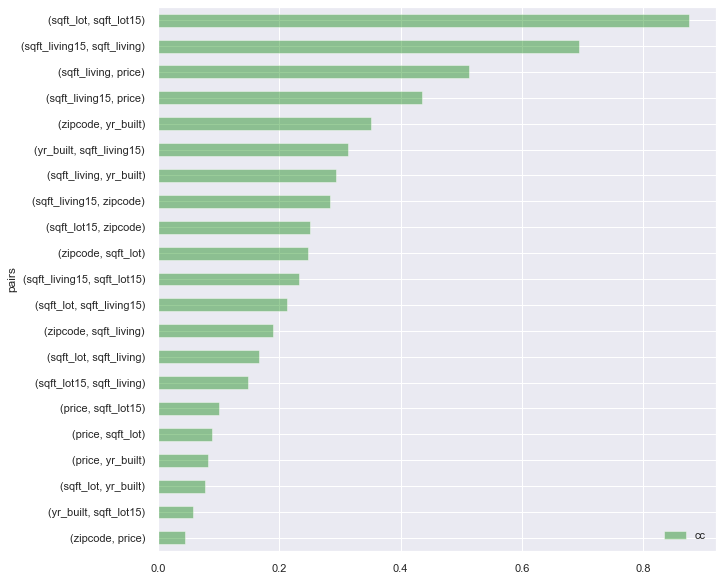

In [69]:
cc1pairs_update_df = cc1pairs_df[cc1pairs_df.cc<1]
cc1pairs_update_df.plot.barh(figsize=(10,10), color='green', alpha=0.4)

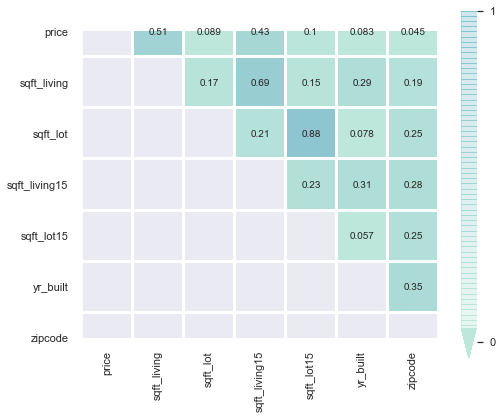

In [58]:
plt.figure(figsize=(8,8))
cbar_kws = {"orientation":"vertical", 
            "shrink":0.8,
            'extend':'min', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,2), 
            "drawedges":True,
           }
sns.heatmap(kc14_cont.corr().abs(), mask=np.tril(kc14_cont.corr().abs()), center=6.0, linewidths=2, square= True, annot=True, cbar_kws=cbar_kws)
plt.show()

In [59]:
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(r"$\rho$ = " + str(round(r, 2)), xy=(.1, 1.), size=15, xycoords=ax.transAxes)
    ax.annotate(f"p = {p:.3f}", xy=(.6, 1.), size=15, xycoords=ax.transAxes)

In [60]:
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (.2, .95), size=20, xycoords = ax.transAxes)

In [61]:
#cont_cols = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15',
#             'yr_built','zipcode']
cont_feats = ['price','sqft_living','sqft_lot','yr_built','zipcode']
g = sns.pairplot(kc14_cont, vars = cont_feats, palette='Dark2')
g.map(corrfunc)
plt.show()

### categorical features

In [64]:
sm = pd.plotting.scatter_matrix(kc12_cate, color='green', alpha=0.2, figsize=[15, 15]);

# Rotates the text
[s.xaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

In [65]:
kc12_cate.corr()

price  bedrooms  bathrooms    floors      view  condition  \
price      1.000000  0.227794   0.343840  0.214946  0.231660   0.093164   
bedrooms   0.227794  1.000000   0.446266  0.124610  0.027790   0.031202   
bathrooms  0.343840  0.446266   1.000000  0.508036  0.071104  -0.139493   
floors     0.214946  0.124610   0.508036  1.000000 -0.010294  -0.279681   
view       0.231660  0.027790   0.071104 -0.010294  1.000000   0.025091   
condition  0.093164  0.031202  -0.139493 -0.279681  0.025091   1.000000   
grade      0.522590  0.279648   0.571275  0.456762  0.114495  -0.171911   
mo_sold   -0.017272  0.000658   0.015196  0.008955  0.000595   0.024288   

              grade   mo_sold  
price      0.522590 -0.017272  
bedrooms   0.279648  0.000658  
bathrooms  0.571275  0.015196  
floors     0.456762  0.008955  
view       0.114495  0.000595  
condition -0.171911  0.024288  
grade      1.000000  0.012540  
mo_sold    0.012540  1.000000

In [66]:
cc2_df = kc12_cate.corr().abs().stack().reset_index().sort_values(0, ascending=True)
print(cc2_df.head())
cc2_df['pairs'] = list(zip(cc2_df.level_0, cc2_df.level_1))
cc2pairs_df = cc2_df.set_index('pairs')
cc2pairs_df = cc2pairs_df.drop(['level_1', 'level_0'], axis=1)
cc2pairs_df.columns = ['cc']
cc2pairs_df = cc2pairs_df.drop_duplicates(keep='first')
cc2pairs_df.head()

     level_0   level_1         0
39      view   mo_sold  0.000595
60   mo_sold      view  0.000595
57   mo_sold  bedrooms  0.000658
15  bedrooms   mo_sold  0.000658
31    floors   mo_sold  0.008955


cc
pairs                        
(view, mo_sold)      0.000595
(mo_sold, bedrooms)  0.000658
(floors, mo_sold)    0.008955
(view, floors)       0.010294
(grade, mo_sold)     0.012540

In [68]:
cc2pairs_update_df = cc2pairs_df[cc2pairs_df.cc<1]
cc2pairs_update_df.plot.barh(figsize=(10,10), color='green', alpha=0.4)

In [70]:
plt.figure(figsize=(8,8))
cbar_kws = {"orientation":"vertical", 
            "shrink":0.8,
            'extend':'min', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,2), 
            "drawedges":True,
           }
sns.heatmap(kc12_cate.corr().abs(), mask=np.tril(kc12_cate.corr().abs()), center=6.0, linewidths=2, square= True, annot=True, cbar_kws=cbar_kws)
plt.show()

In [72]:
cate_feats = ['price','bathrooms','view','grade']
g = sns.pairplot(kc12_cate, vars = cate_feats, palette='Dark2')
g.map(corrfunc)
plt.show()

## all features

In [81]:
all_feats = cate_feats + cont_feats
kc12_all = kc11.loc[:, all_feats]
kc12_all = kc12_all.loc[:,~kc12_all.columns.duplicated()]
print(kc12_all.shape)
kc12_all.head()

(16319, 8)


price  bathrooms  view  grade  sqft_living  sqft_lot  yr_built  zipcode
0  221900.0       1.00   0.0      7         1180      5650      1955    98178
1  538000.0       2.25   0.0      7         2570      7242      1951    98125
2  180000.0       1.00   0.0      6          770     10000      1933    98028
3  604000.0       3.00   0.0      7         1960      5000      1965    98136
4  510000.0       2.00   0.0      8         1680      8080      1987    98074

In [82]:
kc12_all.corr()

price  bathrooms      view     grade  sqft_living  sqft_lot  \
price        1.000000   0.343840  0.231660  0.522590     0.512244 -0.089257   
bathrooms    0.343840   1.000000  0.071104  0.571275     0.671021 -0.080685   
view         0.231660   0.071104  1.000000  0.114495     0.139852  0.031398   
grade        0.522590   0.571275  0.114495  1.000000     0.611588 -0.031625   
sqft_living  0.512244   0.671021  0.139852  0.611588     1.000000  0.166807   
sqft_lot    -0.089257  -0.080685  0.031398 -0.031625     0.166807  1.000000   
yr_built    -0.082819   0.541244 -0.083453  0.459302     0.292758 -0.078220   
zipcode      0.045228  -0.211087  0.128945 -0.176663    -0.190088 -0.247456   

             yr_built   zipcode  
price       -0.082819  0.045228  
bathrooms    0.541244 -0.211087  
view        -0.083453  0.128945  
grade        0.459302 -0.176663  
sqft_living  0.292758 -0.190088  
sqft_lot    -0.078220 -0.247456  
yr_built     1.000000 -0.351313  
zipcode     -0.351313  1.000000

In [83]:
cc3_df = kc12_all.corr().abs().stack().reset_index().sort_values(0, ascending=True)
print(cc3_df.head())
cc3_df['pairs'] = list(zip(cc3_df.level_0, cc3_df.level_1))
cc3pairs_df = cc3_df.set_index('pairs')
cc3pairs_df = cc3pairs_df.drop(['level_1', 'level_0'], axis=1)
cc3pairs_df.columns = ['cc']
cc3pairs_df = cc3pairs_df.drop_duplicates(keep='first')
cc3pairs_df.head()

     level_0   level_1         0
21      view  sqft_lot  0.031398
42  sqft_lot      view  0.031398
43  sqft_lot     grade  0.031625
29     grade  sqft_lot  0.031625
56   zipcode     price  0.045228


cc
pairs                         
(view, sqft_lot)      0.031398
(sqft_lot, grade)     0.031625
(zipcode, price)      0.045228
(view, bathrooms)     0.071104
(yr_built, sqft_lot)  0.078220

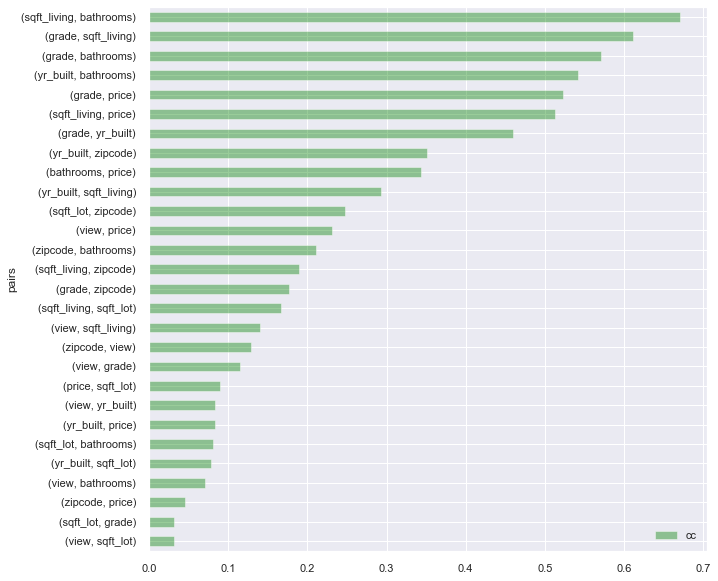

In [85]:
cc3pairs_update_df = cc3pairs_df[cc3pairs_df.cc<1]
cc3pairs_update_df.plot.barh(figsize=(10,10), color='green', alpha=0.4)

In [86]:
plt.figure(figsize=(8,8))
cbar_kws = {"orientation":"vertical", 
            "shrink":0.8,
            'extend':'min', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,2), 
            "drawedges":True,
           }
sns.heatmap(kc12_all.corr().abs(), mask=np.tril(kc12_all.corr().abs()), center=6.0, linewidths=2, square= True, annot=True, cbar_kws=cbar_kws)
plt.show()

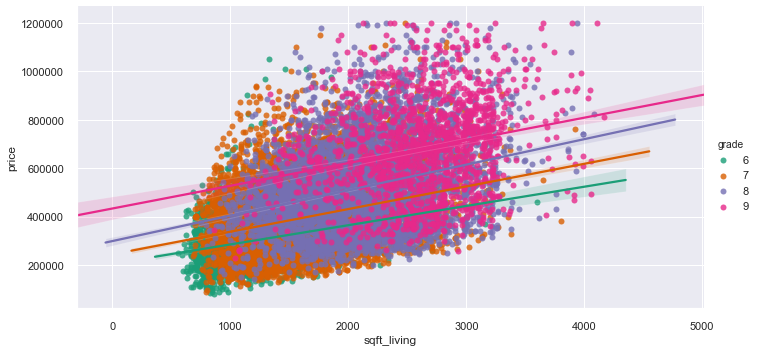

In [95]:
sns.lmplot(x ='sqft_living', y ='price', data = kc12_all, hue='grade', height=5, aspect=2, palette='Dark2', fit_reg=True) 

In [96]:
sns.lmplot(x ='sqft_living', y ='price', data = kc12_all, hue='view', height=5, aspect=2, palette='Dark2', fit_reg=True) 

In [99]:
kc12_all_set1 = kc12_all[kc12_all.bathrooms<2]
sns.lmplot(x ='sqft_living', y ='price', data = kc12_all_set1, hue='bathrooms', height=5, aspect=2, palette='Dark2', fit_reg=True) 

In [102]:
kc12_all.bathrooms.value_counts(normalize=True)

2.50    0.250260
1.00    0.201360
1.75    0.158343
2.00    0.101354
2.25    0.099393
1.50    0.078988
2.75    0.046878
3.00    0.027820
3.50    0.016729
3.25    0.014278
3.75    0.001716
4.00    0.001226
0.75    0.001164
1.25    0.000368
0.50    0.000123
Name: bathrooms, dtype: float64

In [101]:
kc12_all_set1 = kc12_all[(kc12_all.bathrooms>1.75) & (kc12_all.bathrooms<=4)]
sns.lmplot(x ='sqft_living', y ='price', data = kc12_all_set1, hue='bathrooms', height=5, aspect=2, palette='Dark2', fit_reg=True) 

In [106]:
kc12_all_set3 = kc12_all[(kc12_all.bathrooms==1.0) | (kc12_all.bathrooms==2.5) | (kc12_all.bathrooms==1.75)]
sns.lmplot(x ='sqft_living', y ='price', data = kc12_all_set3, hue='bathrooms', height=5, aspect=2, palette='Dark2', fit_reg=True) 

## build baseline model
### simple linear regression

King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~price
-------------------------------------------------------------------------------------


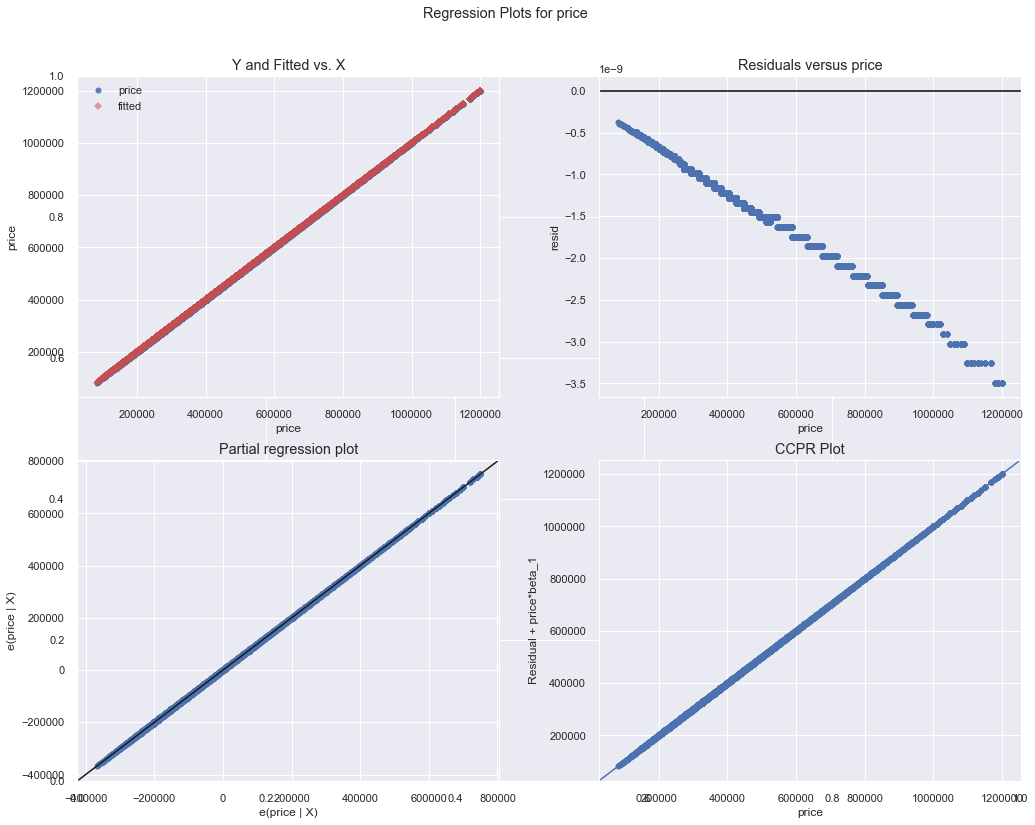

Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~bathrooms
-------------------------------------------------------------------------------------


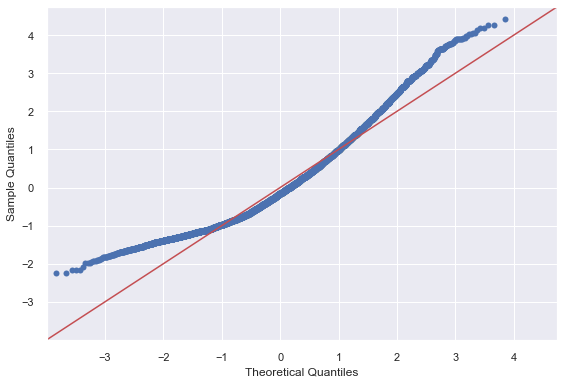

Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~view
-------------------------------------------------------------------------------------


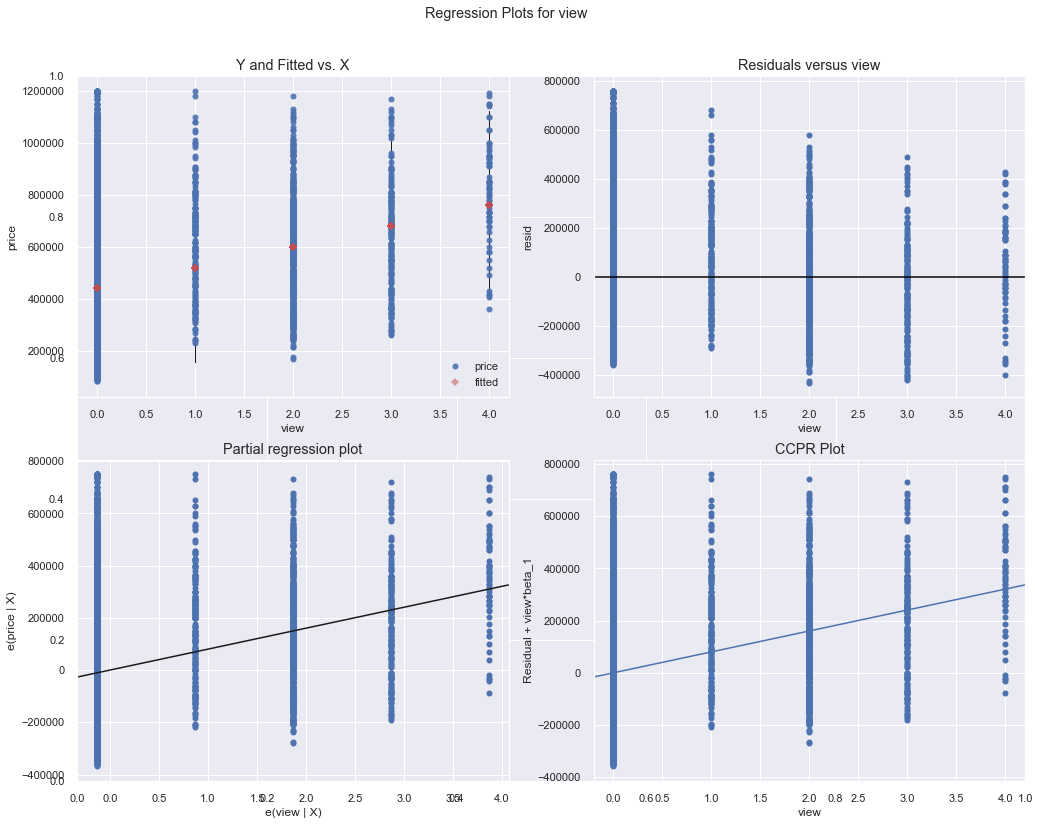

Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~grade
-------------------------------------------------------------------------------------


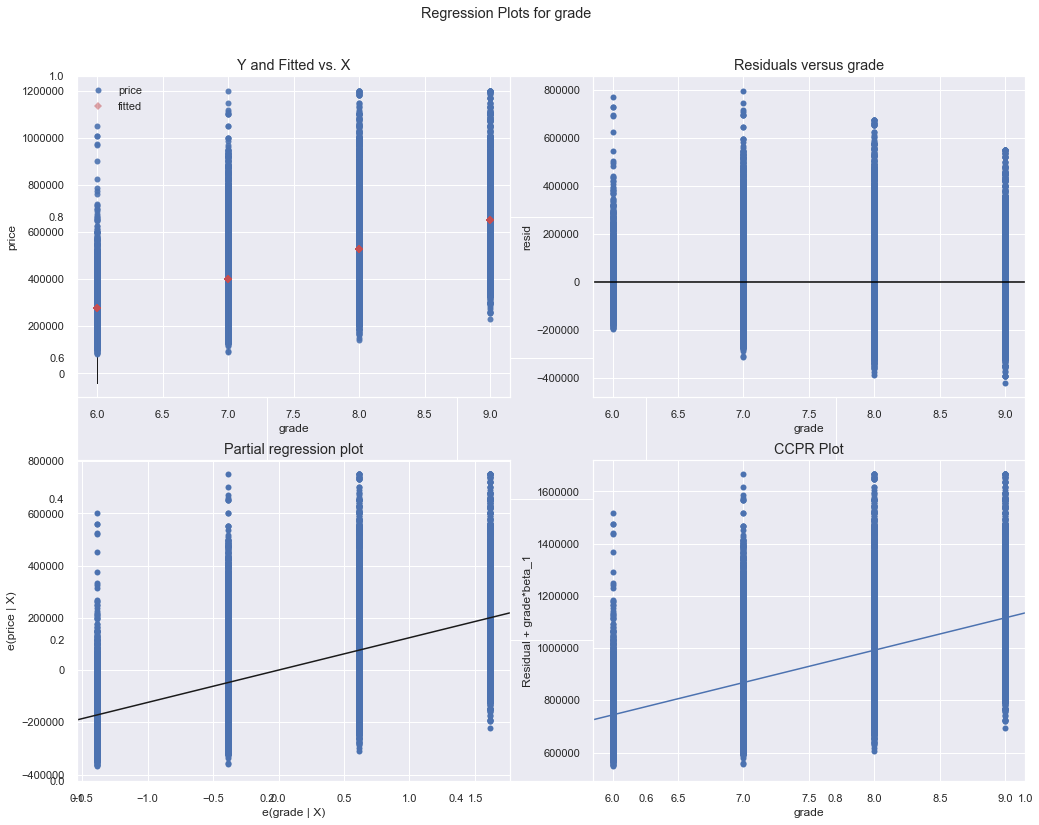

Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~sqft_living
-------------------------------------------------------------------------------------


Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~sqft_lot
-------------------------------------------------------------------------------------


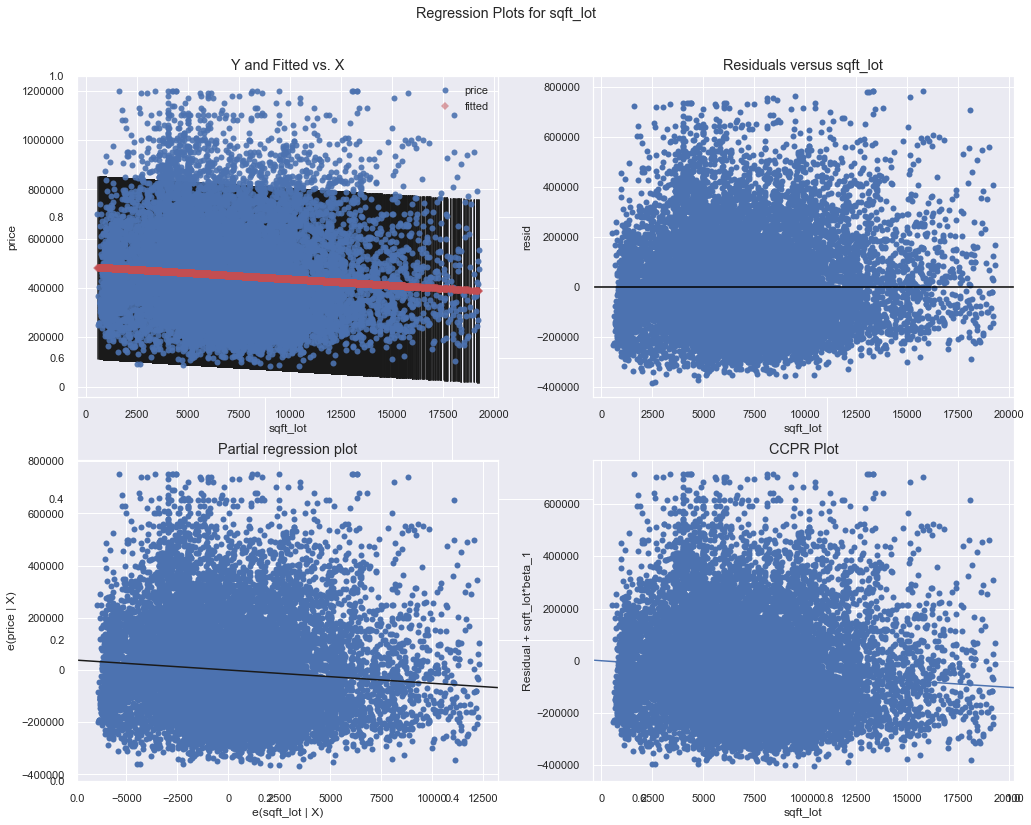

Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~yr_built
-------------------------------------------------------------------------------------


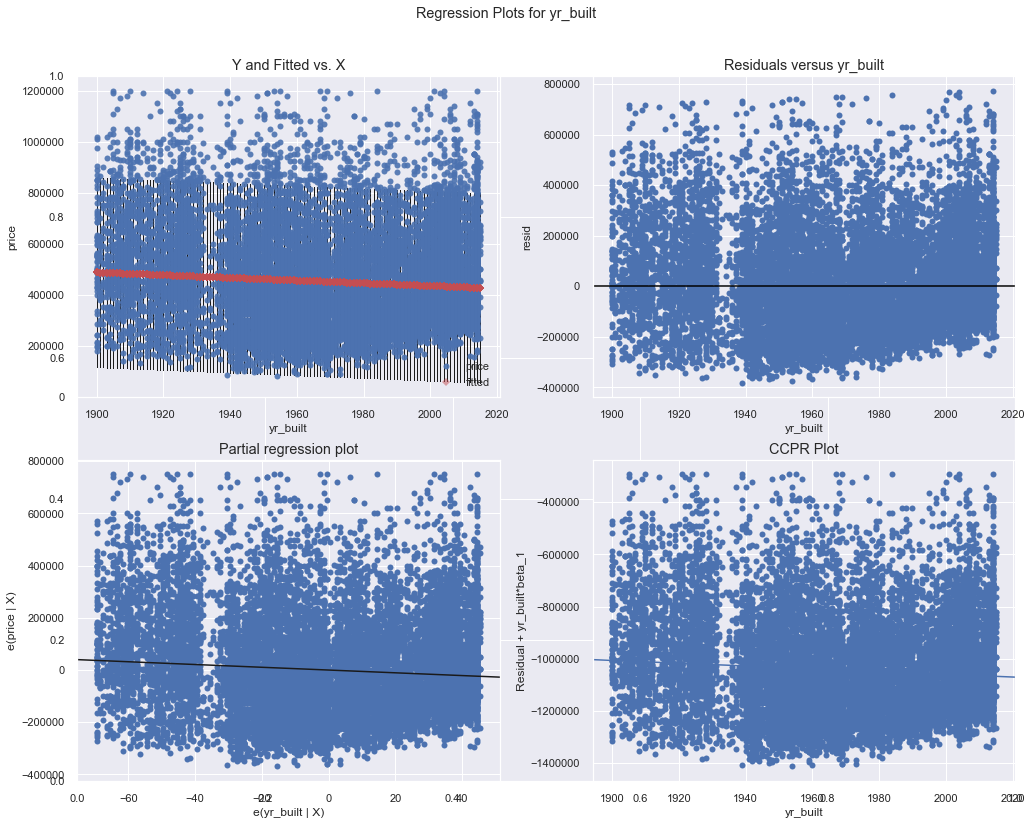

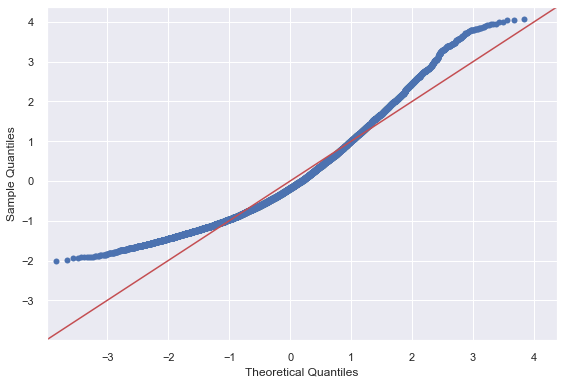

Press Enter to continue...
King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~zipcode
-------------------------------------------------------------------------------------


Press Enter to continue...


[['price',
  1.0,
  1.5685230891904212e-10,
  1.0000000000000027,
  0.0,
  3281.684617548951],
 ['bathrooms',
  0.1182258905659932,
  251748.8792441405,
  100227.53756713016,
  0.0,
  2536.0013423198347],
 ['view',
  0.05366651017417623,
  439587.5766730592,
  80193.39844429401,
  9.704603003360979e-198,
  2501.5455289111505],
 ['grade',
  0.2731004006290306,
  -465730.1067634262,
  124009.79899494188,
  0.0,
  2198.5131020748604],
 ['sqft_living',
  0.262394355179577,
  155487.09364112592,
  162.0821523475533,
  0.0,
  1610.043386807098],
 ['sqft_lot',
  0.00796684110731627,
  485656.7994097989,
  -5.089759449084151,
  3.1668564017023896e-30,
  2778.7316555706466],
 ['yr_built',
  0.006859060100859904,
  1493200.8316506553,
  -529.6225930381204,
  3.069128356930126e-26,
  2386.9820023117545],
 ['zipcode',
  0.002045601900174776,
  -15153837.731613366,
  159.0898592567396,
  7.45913028738281e-09,
  2579.3881865474364]]

In [110]:
results = []
for idx, col in enumerate(kc12_all.columns):
    print (f"King Housing DataSet - Regression Analysis and Diagnostics for SalePrice~{col}")
    print ("-------------------------------------------------------------------------------------")

    f = f'price~{col}'
    model = ols(formula=f, data=kc12_all).fit()
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([col, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
    input("Press Enter to continue...")
    
results

### multiple linear regression

In [112]:
kc13_all = kc12_all.drop(['price'], axis=1)
outcome = 'price'
x_cols = list(kc13_all.columns)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kc12_all).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     2390.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:16:38   Log-Likelihood:            -2.1577e+05
No. Observations:               16319   AIC:                         4.316e+05
Df Residuals:                   16311   BIC:                         4.316e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.258e+06   2.17e+06      2.423      0.015       1e+06    9.51e+06
bathrooms    2.569e+04   2554.485     10.055      0.000    2.07e+04    3.07e+04
view          3.35e+04   1965.774     17.041      0.000    2.96e+04    3.74e+04
grade        1.118e+05   1806.435     61.916      0.000    1.08e+05    1.15e+05
sqft_living    96.9299      2.736     35.424      0.000      91.567     102.293
sqft_lot       -8.8989      0.346    -25.747      0.000      -9.576      -8.221
yr_built    -2820.5669     46.333    -60.876      0.000   -2911.385   -2729.749
zipcode        -2.5291     21.834     -0.116      0.908     -45.325      40.267
==============================================================================
Omnibus:                     1114.582   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1813.032
Skew:                           0.539   Prob(JB):                         0.00
Kurtosis:                       4.227   Cond. No.                     2.04e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
kc14_all = kc13_all.drop(['zipcode'], axis=1)
outcome = 'price'
x_cols = list(kc14_all.columns)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kc12_all).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     2789.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:18:28   Log-Likelihood:            -2.1577e+05
No. Observations:               16319   AIC:                         4.316e+05
Df Residuals:                   16312   BIC:                         4.316e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.007e+06   8.31e+04     60.223      0.000    4.84e+06    5.17e+06
bathrooms    2.569e+04   2553.666     10.061      0.000    2.07e+04    3.07e+04
view         3.347e+04   1949.260     17.171      0.000    2.96e+04    3.73e+04
grade        1.118e+05   1806.374     61.919      0.000    1.08e+05    1.15e+05
sqft_living    96.9389      2.735     35.442      0.000      91.578     102.300
sqft_lot       -8.8877      0.332    -26.786      0.000      -9.538      -8.237
yr_built    -2819.0426     44.424    -63.457      0.000   -2906.119   -2731.966
==============================================================================
Omnibus:                     1115.877   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1815.573
Skew:                           0.539   Prob(JB):                         0.00
Kurtosis:                       4.227   Cond. No.                     6.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## investigate multicollinearity

In [114]:
X = kc12_all[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bathrooms', 21.13782271373948),
 ('view', 1.08434502491128),
 ('grade', 159.41204144753792),
 ('sqft_living', 24.39078565526562),
 ('sqft_lot', 6.0236477609990295),
 ('yr_built', 119.60203005896979)]

In [115]:
kc15_all = kc14_all.drop(['grade'], axis=1)
outcome = 'price'
x_cols = list(kc15_all.columns)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kc12_all).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     2089.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:26:56   Log-Likelihood:            -2.1749e+05
No. Observations:               16319   AIC:                         4.350e+05
Df Residuals:                   16313   BIC:                         4.350e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.109e+06    9.1e+04     45.170      0.000    3.93e+06    4.29e+06
bathrooms    3.928e+04   2827.365     13.892      0.000    3.37e+04    4.48e+04
view          4.43e+04   2157.457     20.532      0.000    4.01e+04    4.85e+04
sqft_living   167.3083      2.765     60.516      0.000     161.889     172.727
sqft_lot      -11.1341      0.367    -30.378      0.000     -11.852     -10.416
yr_built    -2015.3090     47.214    -42.685      0.000   -2107.853   -1922.765
==============================================================================
Omnibus:                     1168.385   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1595.020
Skew:                           0.624   Prob(JB):                         0.00
Kurtosis:                       3.889   Cond. No.                     6.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
X = kc12_all[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bathrooms', 20.451832644737625),
 ('view', 1.0795869572930408),
 ('sqft_living', 20.51326669142543),
 ('sqft_lot', 5.94595437991847),
 ('yr_built', 16.88550267279012)]

In [117]:
kc16_all = kc15_all.drop(['bathrooms'], axis=1)
outcome = 'price'
x_cols = list(kc16_all.columns)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kc12_all).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     2533.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:31:32   Log-Likelihood:            -2.1759e+05
No. Observations:               16319   AIC:                         4.352e+05
Df Residuals:                   16314   BIC:                         4.352e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     3.54e+06   8.17e+04     43.332      0.000    3.38e+06     3.7e+06
view          4.54e+04   2168.646     20.934      0.000    4.11e+04    4.96e+04
sqft_living   192.3687      2.107     91.284      0.000     188.238     196.499
sqft_lot      -12.2972      0.359    -34.262      0.000     -13.001     -11.594
yr_built    -1705.7028     41.867    -40.741      0.000   -1787.766   -1623.639
==============================================================================
Omnibus:                     1131.747   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1519.235
Skew:                           0.617   Prob(JB):                         0.00
Kurtosis:                       3.845   Cond. No.                     5.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
X = kc12_all[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('view', 1.0788992756294302),
 ('sqft_living', 10.900444264633752),
 ('sqft_lot', 5.502119299422084),
 ('yr_built', 13.023537331981961)]

In [119]:
kc17_all = kc16_all.drop(['yr_built'], axis=1)
outcome = 'price'
x_cols = list(kc17_all.columns)
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=kc12_all).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     2564.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:34:17   Log-Likelihood:            -2.1838e+05
No. Observations:               16319   AIC:                         4.368e+05
Df Residuals:                   16315   BIC:                         4.368e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     2.16e+05   4389.304     49.216      0.000    2.07e+05    2.25e+05
view         5.702e+04   2256.468     25.268      0.000    5.26e+04    6.14e+04
sqft_living   164.3507      2.091     78.606      0.000     160.253     168.449
sqft_lot      -10.3253      0.373    -27.661      0.000     -11.057      -9.594
==============================================================================
Omnibus:                     1354.576   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1799.864
Skew:                           0.715   Prob(JB):                         0.00
Kurtosis:                       3.777   Cond. No.                     2.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
X = kc12_all[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('view', 1.074686581372987),
 ('sqft_living', 4.50355142706135),
 ('sqft_lot', 4.410458144151208)]

## check normality

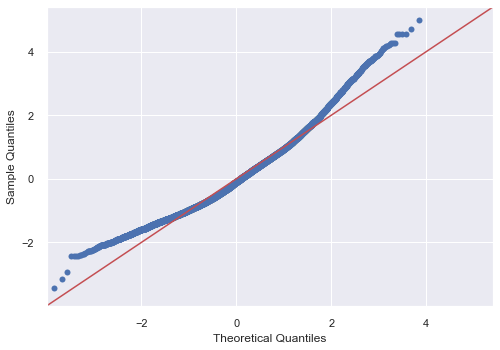

In [121]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## check homoscedasticity

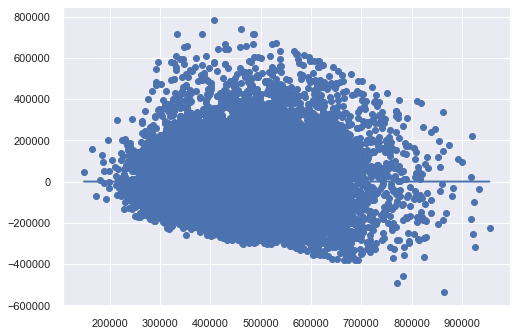

In [122]:
plt.scatter(model.predict(kc12_all[x_cols]), model.resid)
plt.plot(model.predict(kc12_all[x_cols]), [0 for i in range(len(kc12_all))])

# EDA Q1:

# EDA Q2:

# modeling data

## remove uninfluential features